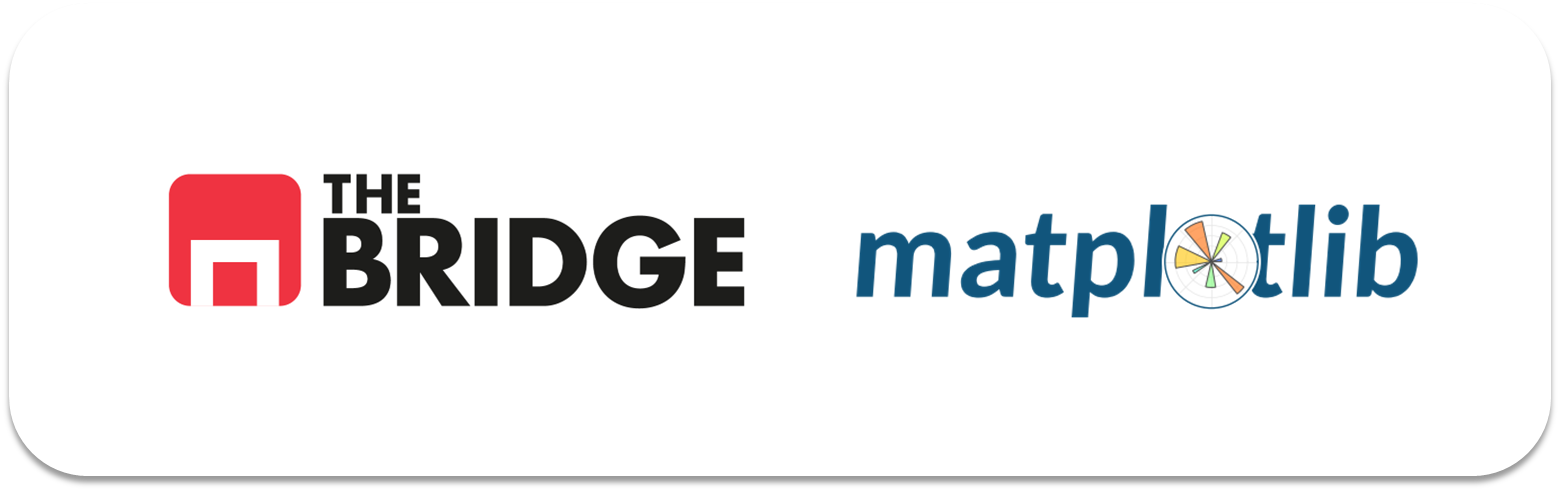

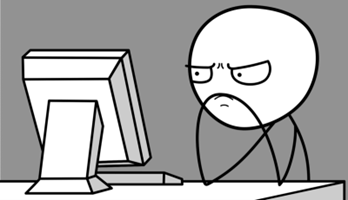

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [6]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")
import numpy as np
import seaborn as sns
import pandas as pd




### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [3]:
# Cargar el dataset del Titanic
df_titanic = sns.load_dataset('titanic')

In [4]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

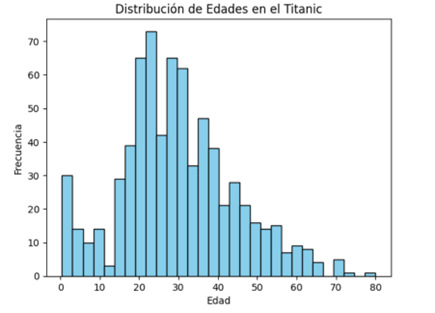

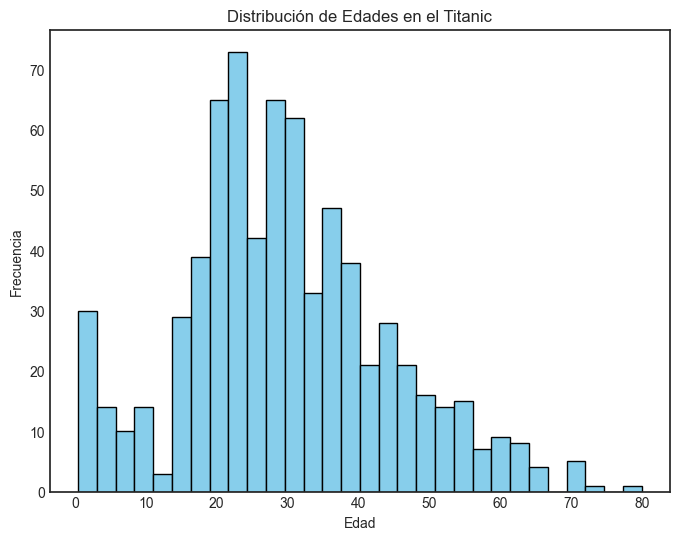

In [5]:

# Cargar el dataset del Titanic desde Seaborn
df_titanic = sns.load_dataset('titanic')

# Crear el histograma
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.hist(df_titanic['age'].dropna(), bins=30, color='skyblue', edgecolor='black')  # Histograma
plt.title("Distribución de Edades en el Titanic")  # Título
plt.xlabel("Edad")  # Etiqueta del eje x
plt.ylabel("Frecuencia")  # Etiqueta del eje y

# Mostrar la figura
plt.show()

### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

Los 3 intervalos con mayor número de viajeros son:
age
[21.641, 24.294)    73
[18.989, 21.641)    65
[26.947, 29.599)    65
Name: count, dtype: int64


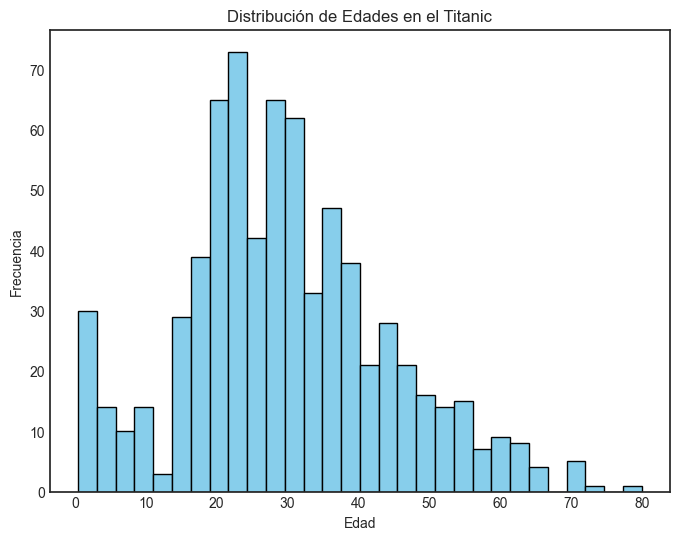

In [7]:
# Crear los intervalos (bins) con 30 divisiones
bins = np.linspace(df_titanic['age'].min(), df_titanic['age'].max(), 31)  # 30 intervalos
labels = pd.cut(df_titanic['age'], bins=bins, right=False)  # Asignar las edades a intervalos

# Calcular la frecuencia por intervalo
frequencies = labels.value_counts().sort_values(ascending=False)

# Mostrar los 3 intervalos con mayor número de viajeros
top_3_intervals = frequencies.head(3)
print("Los 3 intervalos con mayor número de viajeros son:")
print(top_3_intervals)

# Visualización opcional del histograma
plt.figure(figsize=(8, 6))
plt.hist(df_titanic['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribución de Edades en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

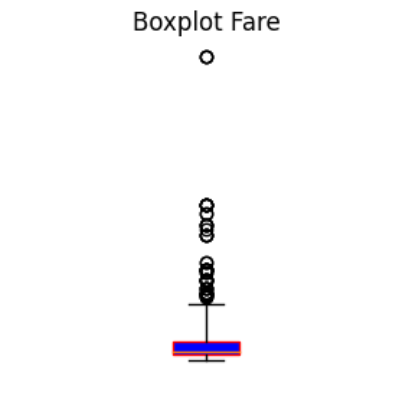

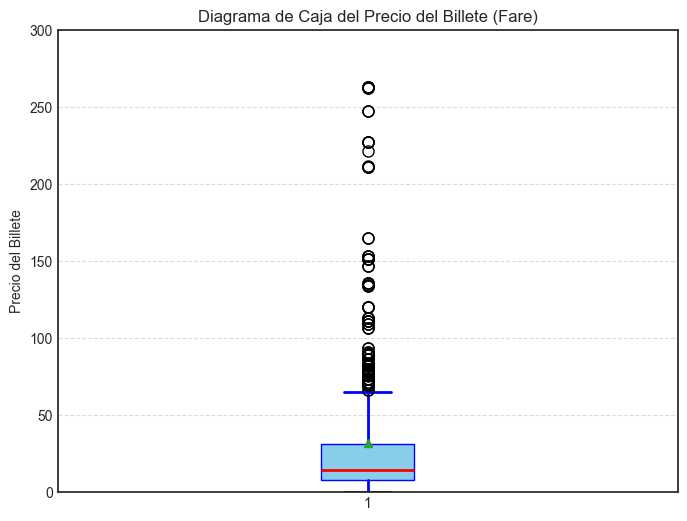

In [8]:
# Crear el diagrama de caja
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.boxplot(
    df_titanic['fare'].dropna(),  # Excluir valores nulos
    patch_artist=True,           # Rellenar el interior de la caja
    showmeans=True,              # Mostrar la media
    flierprops=dict(marker='o', color='red', markersize=8),  # Estilo de los outliers
    boxprops=dict(facecolor='skyblue', color='blue'),        # Estilo de la caja
    whiskerprops=dict(color='blue', linewidth=2),           # Estilo de los bigotes
    capprops=dict(color='blue', linewidth=2),               # Estilo de las líneas de los extremos
    medianprops=dict(color='red', linewidth=2)              # Estilo de la mediana
)

# Configuración de los bigotes: 3 IQR
plt.gca().set_ylim(0, 300)  # Ajustar el rango del eje Y para visualizar mejor
plt.title("Diagrama de Caja del Precio del Billete (Fare)")
plt.ylabel("Precio del Billete")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la figura
plt.show()

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

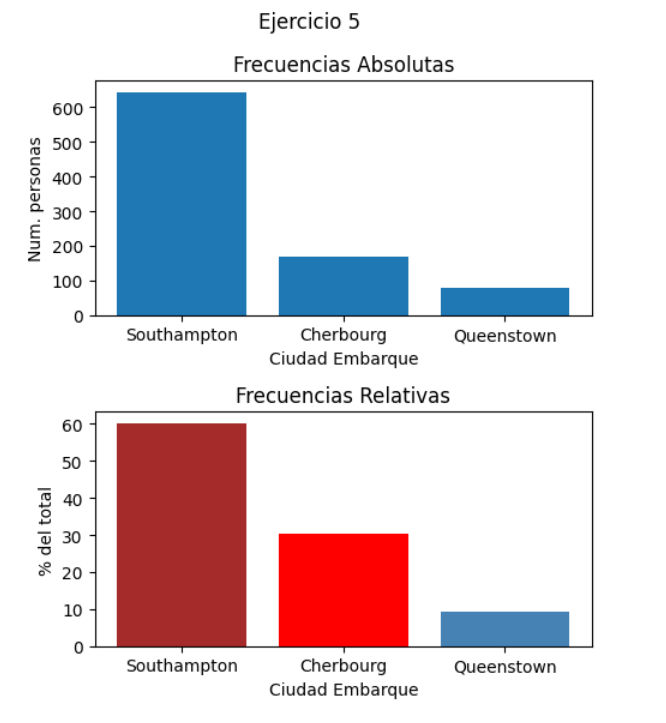

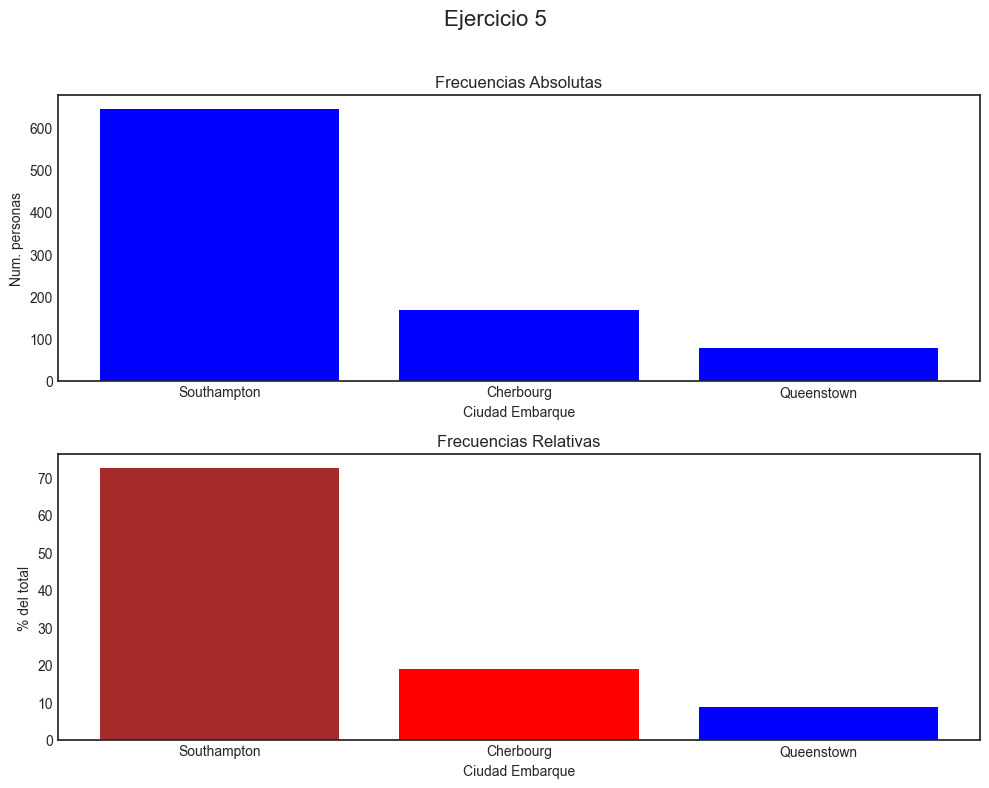

In [9]:
# Calcular frecuencias absolutas y relativas
absolute_frequencies = df_titanic['embark_town'].value_counts()
relative_frequencies = df_titanic['embark_town'].value_counts(normalize=True) * 100  # % del total

# Crear la figura
plt.figure(figsize=(10, 8))

# Subplot 1: Frecuencias absolutas
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
plt.bar(absolute_frequencies.index, absolute_frequencies.values, color='blue')
plt.title("Frecuencias Absolutas")
plt.xlabel("Ciudad Embarque")
plt.ylabel("Num. personas")

# Subplot 2: Frecuencias relativas
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
plt.bar(relative_frequencies.index, relative_frequencies.values, color=['brown', 'red', 'blue'])
plt.title("Frecuencias Relativas")
plt.xlabel("Ciudad Embarque")
plt.ylabel("% del total")

# Ajustar diseño
plt.suptitle("Ejercicio 5", fontsize=16)  # Título general
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar espacio para el título general

# Mostrar el gráfico
plt.show()


### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

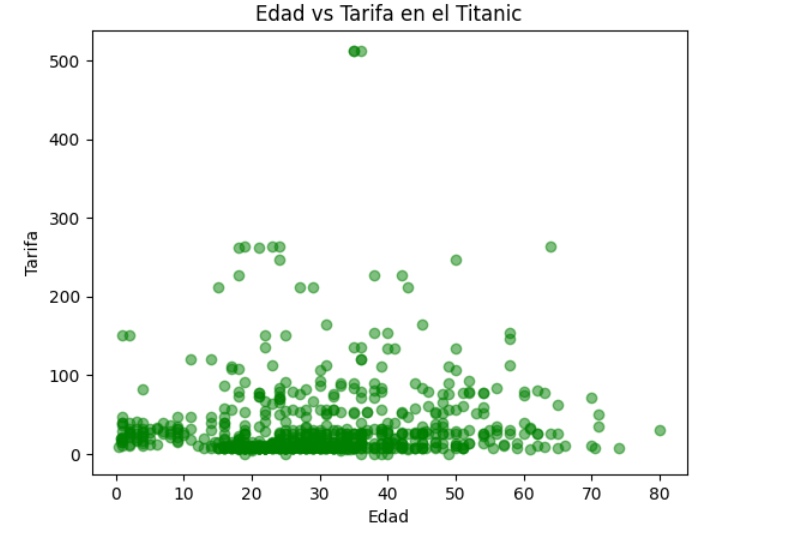

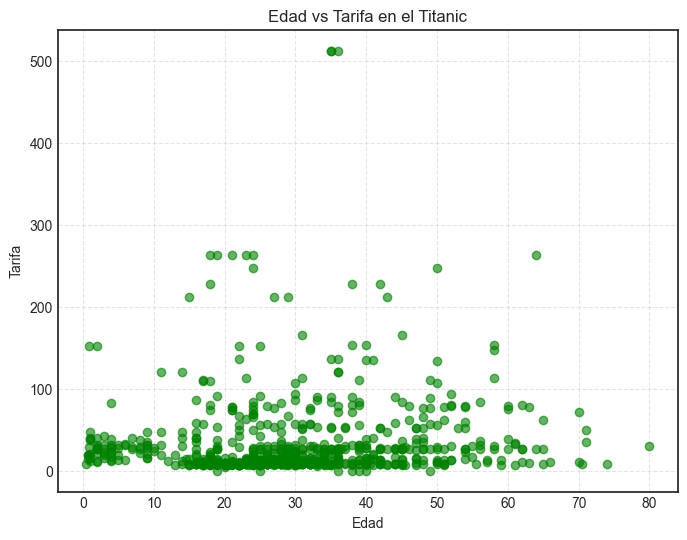

In [10]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.scatter(
    df_titanic['age'], 
    df_titanic['fare'], 
    alpha=0.6,  # Transparencia de los puntos
    color='green'
)

# Personalizar el gráfico
plt.title("Edad vs Tarifa en el Titanic")  # Título del gráfico
plt.xlabel("Edad")  # Etiqueta del eje X
plt.ylabel("Tarifa")  # Etiqueta del eje Y
plt.grid(True, linestyle='--', alpha=0.5)  # Agregar cuadrícula

# Mostrar el gráfico
plt.show()

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [11]:
# Calcular el precio medio por edad
mean_fare_by_age = df_titanic.groupby('age')['fare'].mean()

# Calcular la desviación estándar del precio por edad
std_fare_by_age = df_titanic.groupby('age')['fare'].std()

# Mostrar los resultados
print("Precio medio por edad:")
print(mean_fare_by_age.head())  # Muestra los primeros resultados

print("\nDesviación estándar por edad:")
print(std_fare_by_age.head())  # Muestra los primeros resultados

Precio medio por edad:
age
0.42      8.5167
0.67     14.5000
0.75     19.2583
0.83     23.8750
0.92    151.5500
Name: fare, dtype: float64

Desviación estándar por edad:
age
0.42         NaN
0.67         NaN
0.75    0.000000
0.83    7.247845
0.92         NaN
Name: fare, dtype: float64


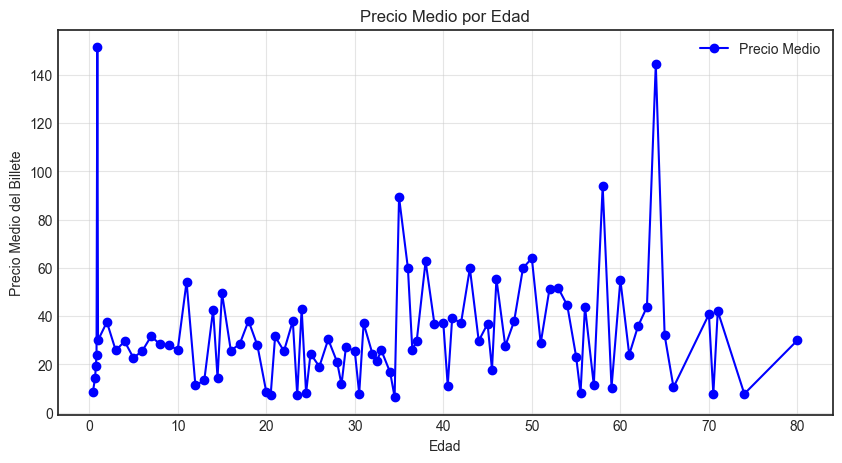

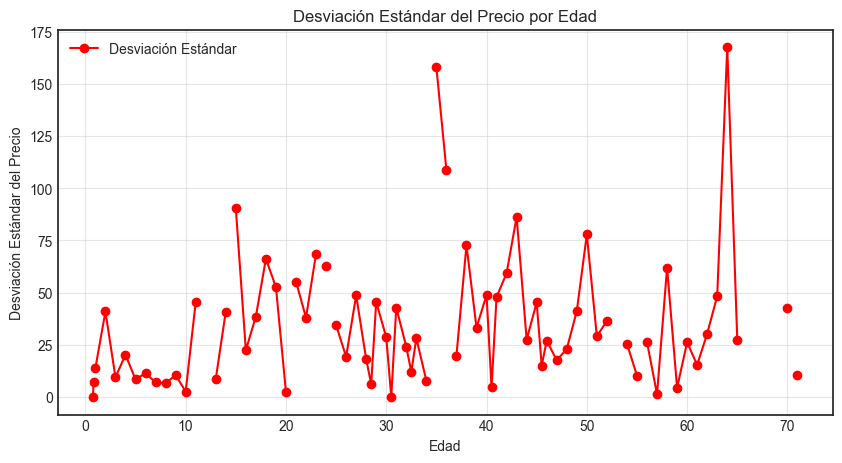

In [12]:
# Calcular el precio medio por edad
mean_fare_by_age = df_titanic.groupby('age')['fare'].mean()

# Calcular la desviación estándar del precio por edad
std_fare_by_age = df_titanic.groupby('age')['fare'].std()

# Graficar el precio medio por edad
plt.figure(figsize=(10, 5))
plt.plot(mean_fare_by_age.index, mean_fare_by_age.values, marker='o', color='blue', label='Precio Medio')
plt.title("Precio Medio por Edad")
plt.xlabel("Edad")
plt.ylabel("Precio Medio del Billete")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

# Graficar la desviación estándar del precio por edad
plt.figure(figsize=(10, 5))
plt.plot(std_fare_by_age.index, std_fare_by_age.values, marker='o', color='red', label='Desviación Estándar')
plt.title("Desviación Estándar del Precio por Edad")
plt.xlabel("Edad")
plt.ylabel("Desviación Estándar del Precio")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

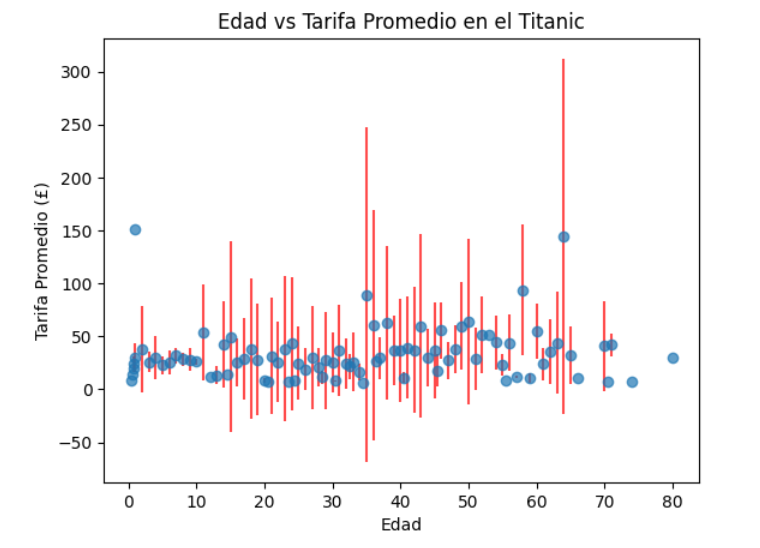

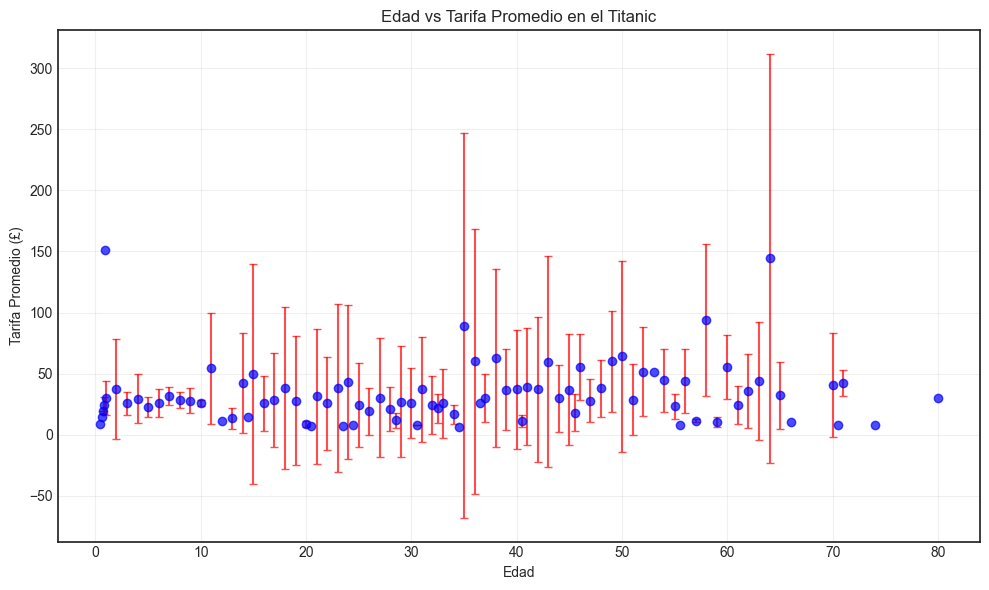

In [16]:

# Crear el diagrama de errores
plt.figure(figsize=(10, 6))
plt.errorbar(
    mean_fare_by_age.index,  # Edad
    mean_fare_by_age.values,  # Tarifa promedio
    yerr=std_fare_by_age.values,  # Error (desviación estándar)
    fmt='o',  # Marcadores circulares
    ecolor='red',  # Color de las barras de error
    capsize=3,  # Tamaño de los bordes de las barras de error
    color='blue',  # Color de los puntos
    alpha=0.7  # Transparencia
)

# Personalización del gráfico
plt.title("Edad vs Tarifa Promedio en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Tarifa Promedio (£)")
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

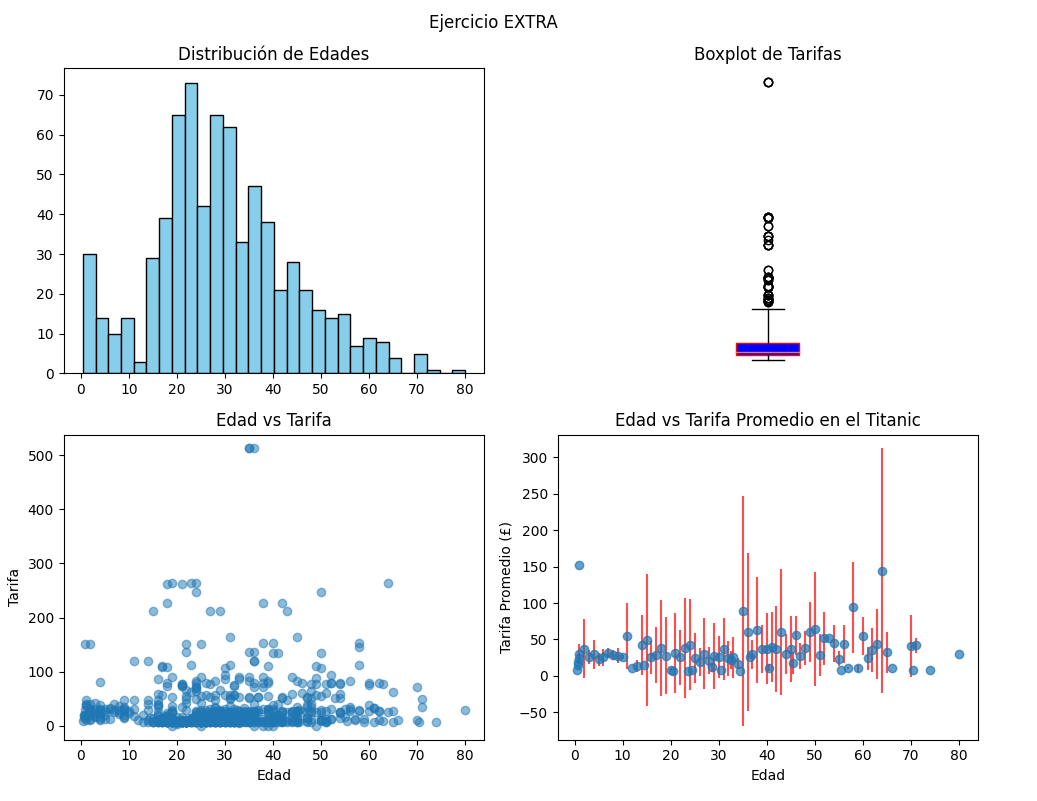

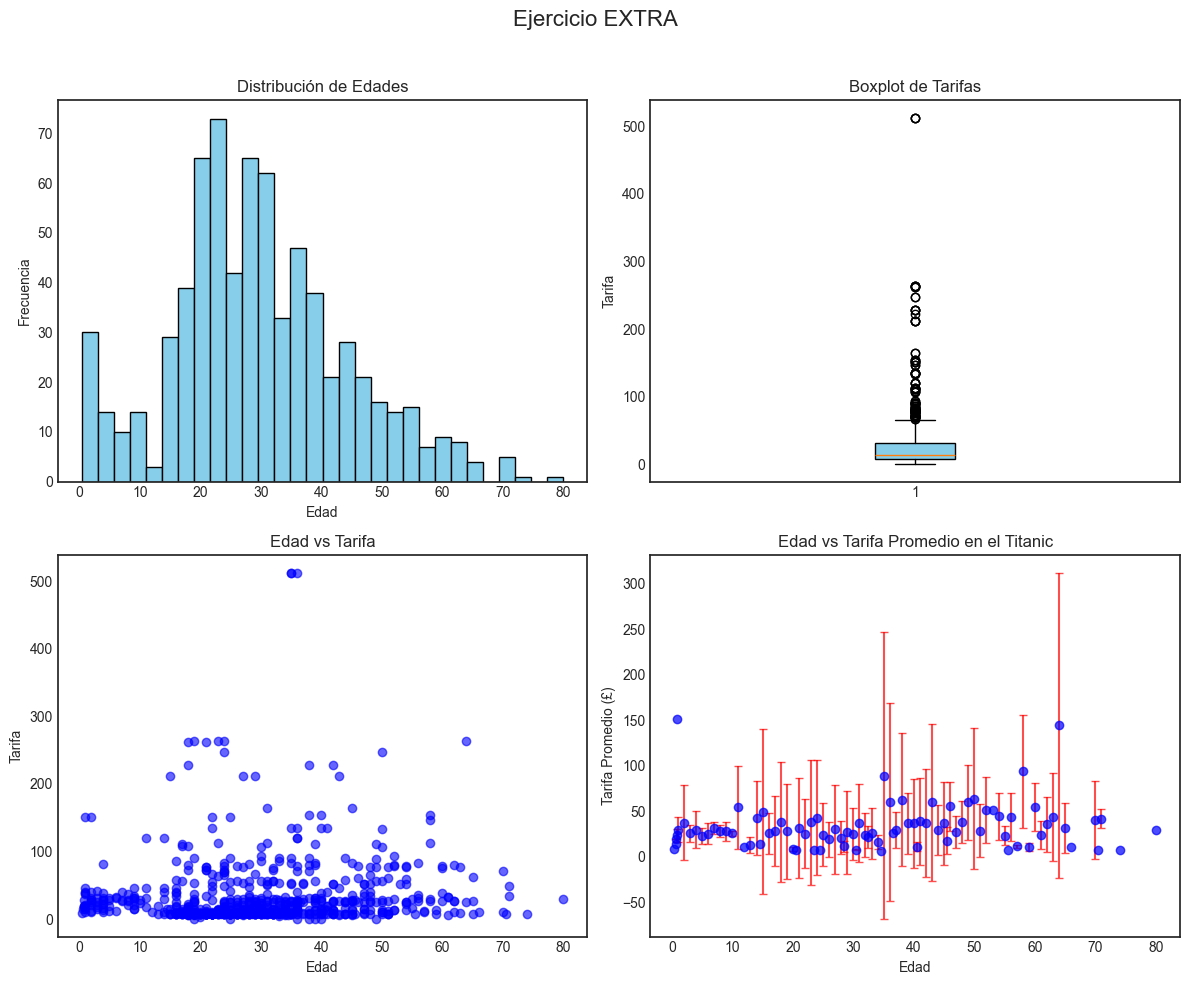

In [17]:
# Crear la figura y los subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Figura con diseño 2x2

# Gráfico 1: Histograma de edades
axs[0, 0].hist(df_titanic['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Distribución de Edades")
axs[0, 0].set_xlabel("Edad")
axs[0, 0].set_ylabel("Frecuencia")

# Gráfico 2: Diagrama de caja del precio del billete
axs[0, 1].boxplot(df_titanic['fare'].dropna(), patch_artist=True, boxprops=dict(facecolor='skyblue'))
axs[0, 1].set_title("Boxplot de Tarifas")
axs[0, 1].set_ylabel("Tarifa")

# Gráfico 3: Gráfico de dispersión (edad vs tarifa)
axs[1, 0].scatter(df_titanic['age'], df_titanic['fare'], alpha=0.6, color='blue')
axs[1, 0].set_title("Edad vs Tarifa")
axs[1, 0].set_xlabel("Edad")
axs[1, 0].set_ylabel("Tarifa")

# Gráfico 4: Diagrama de errores (edad vs tarifa promedio)
axs[1, 1].errorbar(
    mean_fare_by_age.index,
    mean_fare_by_age.values,
    yerr=std_fare_by_age.values,
    fmt='o',
    ecolor='red',
    color='blue',
    capsize=3,
    alpha=0.7
)
axs[1, 1].set_title("Edad vs Tarifa Promedio en el Titanic")
axs[1, 1].set_xlabel("Edad")
axs[1, 1].set_ylabel("Tarifa Promedio (£)")

# Ajustar diseño
fig.suptitle("Ejercicio EXTRA", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar espacio para el título general

# Mostrar la figura
plt.show()